In [2]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np

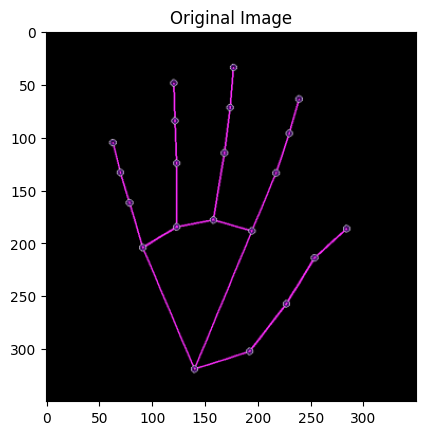

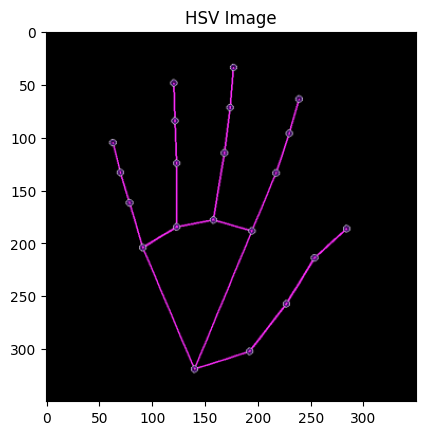

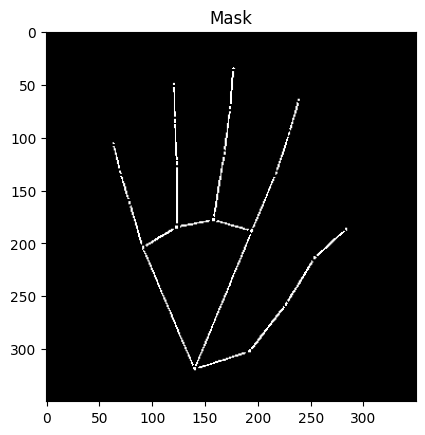

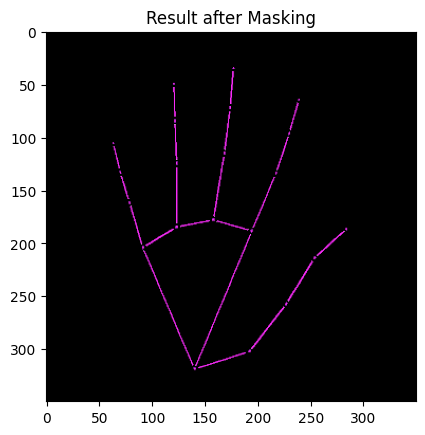

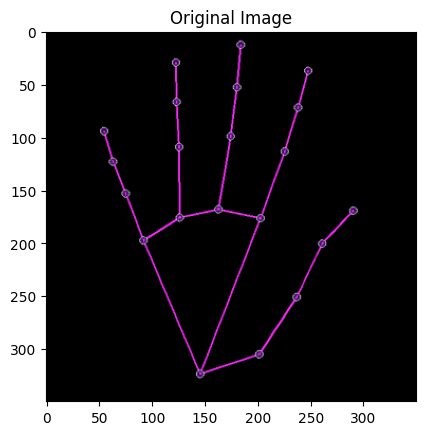

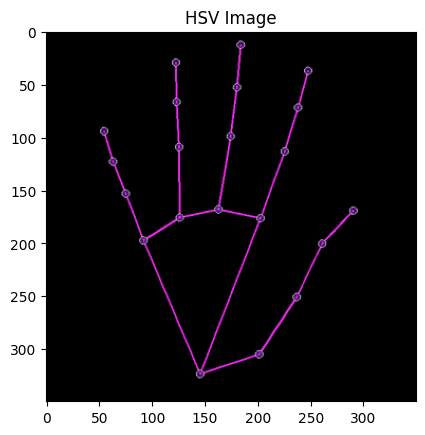

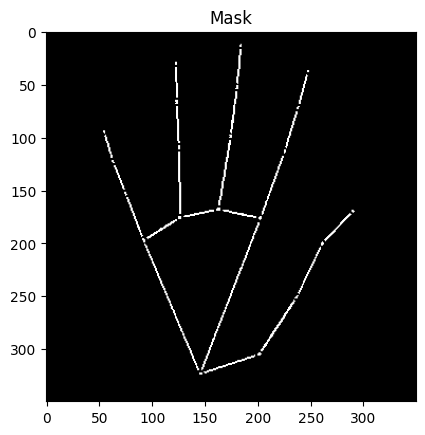

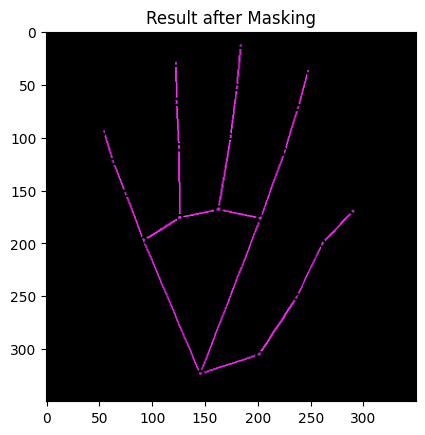

The gestures are similar.


True

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, show_steps=True):
    # Load image
    img = cv2.imread(image_path)
    if show_steps:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.show()

    # Convert to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    if show_steps:
        plt.imshow(cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB))
        plt.title("HSV Image")
        plt.show()

    # Define pink color range and create mask
    lower_pink = np.array([140, 100, 100])
    upper_pink = np.array([170, 255, 255])
    mask = cv2.inRange(hsv_img, lower_pink, upper_pink)
    if show_steps:
        plt.imshow(mask, cmap='gray')
        plt.title("Mask")
        plt.show()

    # Apply mask
    result = cv2.bitwise_and(img, img, mask=mask)
    if show_steps:
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Result after Masking")
        plt.show()

    return result

def match_gestures(image1_path, image2_path, threshold=120, show_preprocess_steps=True):
    img1 = preprocess_image(image1_path, show_steps=show_preprocess_steps)
    img2 = preprocess_image(image2_path, show_steps=show_preprocess_steps)
    
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    
    if len(matches) > threshold:
        print("The gestures are similar.")
        return True
    else:
        print("The gestures are not similar.")
        return False

# Example usage (paths need to be valid image paths for actual execution)
image1_path = 'saved_imgs/cropped_hand_23.png'
image2_path = 'base_gestures/start_base.png'
match_gestures(image1_path, image2_path, show_preprocess_steps=True)
